# Unsupervised Learning
Unsupervised Learning tis the process of training a model when labels for the data(or the desired outcome) are not give. Instead, unsupervised algorithms such as CLustering, Anomaly Detection and Density Estimation do not require lables. Instead, these algorithms find patterns in the dataset and present them as result. The first topic is to explore the process of clustering. 

In [6]:
# importing modules and setting controls
# Modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
%matplotlib inline

# Directory 
images_dir = "."
dir_name = "unsupervised_learning_images"
pathway = os.path.join(images_dir, dir_name)
os.makedirs(pathway, exist_ok = True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(pathway, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Clustering
Clustering is an unsupervised learning method in which similiar insances are grouped together in groups called clusters (usually having a cluster centre). Cluster can be used for 1) Customer segemnetation(recommendors) 2) Search Engines 3) Image Segmentation(Semantic or instance) 4) Semi-supervised learning 5)  Dimensionality Reduction 6) Data Visuzliaztion & Analysis

In [2]:
# Data
from sklearn.datasets import make_blobs
# Creating blob centers
blob_centres = np.array([[-3, -2], [0, 0], [1, 7], [2, 3], [4, -4]])

X, Y = make_blobs(n_samples = 2000,centers = blob_centres)

In [3]:
# Always scale data before clustering
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Saving figure clustering


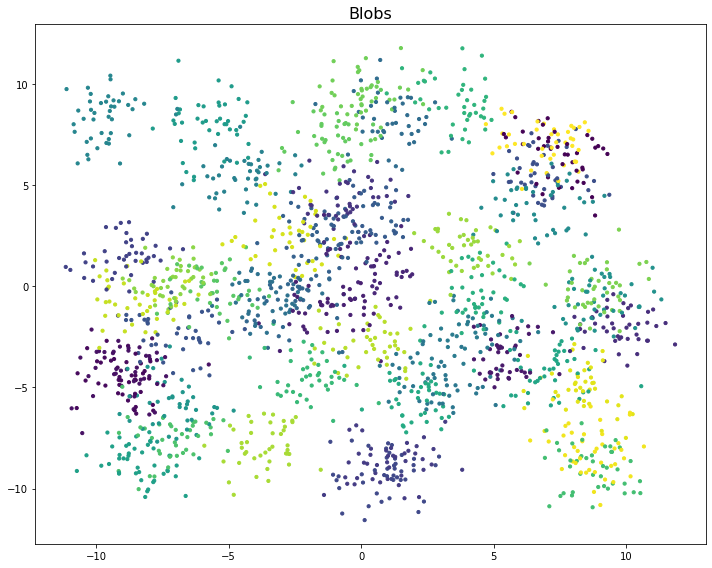

In [27]:
# Data Visualization 
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0],X[:, 1],  c= Y, s = 10)
plt.title("Blobs", fontsize = 16)
save_fig("clustering")
#plt.show()

### Perform K-Means and explore all the methods 
The aim of the task is to ues K-Means and explroe all the methods it provides us with.

In [9]:
# Importing K-Means
from sklearn.cluster import KMeans


In [10]:
# K-Means requries us to mention the number of clusters
kmeans = KMeans(n_clusters = 5, n_init = 20)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# Returning the labels of the instances
kmeans.labels_

array([3, 2, 3, ..., 1, 4, 2])

In [12]:
# Kmeans Inertia
kmeans.inertia_  # Very high inetia of 3783
# Just scaling the data mad clustering very tight with inertia of 412

399.35254413108146

In [13]:
# KMeans Score
kmeans.score(X) # In negatives as for Scikit; bigger is better

-399.35254413108146

In [14]:
# Kmeans Predict
kmeans.predict(X) # Predicts the labels

array([3, 2, 3, ..., 1, 4, 2])

In [15]:
# KMeans cluster centres
kmeans.cluster_centers_ # Returns the cluster centres

array([[ 1.2624334 , -1.20891822],
       [ 0.53170555,  0.52283759],
       [-1.55073392, -0.68772442],
       [ 0.0716038 ,  1.54345687],
       [-0.34584204, -0.20476067]])

In [16]:
# The transform method returns the distance to each centroid
distances = kmeans.transform(X)
# Trying to manually label elements
labels = np.argmin(distances, axis = 1)
# Is it how the labels are computed?
(labels == kmeans.labels_).all()
# Yes, it is how the labels are predicted

True

### Exploring different KMeans algorithms
In this exercise, the mini-batch KMeans is going to be explored.

In [17]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters = 5, verbose = 0)

# Fit the Blob Data
mbk.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [18]:
mbk.inertia_ # Slightly higher than normal KMeans. This is the case for KMeans

404.232338801816

The MiniBatchKMeans is an algorith which can be used for several different applicationsand has many advantages. THe advantages are - 
1) It is about 4 times as fast as the normal KMeans(with accelerated)
2) It can cluster data that does not fit in memory by using np.memmap 

But, that being said, it performs slightly worse than the normal KMeans methods because of the smaller datasets being availabe. The differnce in performance whill be illustrated in the code below.

In [19]:
# Importin time for the following code
import time

In [20]:
# Illustrating the time and perforance trade off
# For differnt clusters
max_clusters = 100
batch_list = np.empty((max_clusters-2, 2))
kmeans_list = np.empty((max_clusters-2, 2))
for clusters in range(2, max_clusters):
    mini_batch = MiniBatchKMeans(n_clusters = clusters)
    kmeans = KMeans(n_jobs = -1, n_clusters = clusters)
    
    # Mini-Batch
    t0 = time.time()
    mini_batch.fit(X)
    t1 = time.time()
    # Time, inertia
    row = np.array([(t1-t0), mini_batch.inertia_])
    batch_list[clusters-2] = row 
    
    
    # KMeans
    t0 = time.time()
    kmeans.fit(X)
    t1 = time.time()
    # Time and inertia
    row2 = np.array([(t1-t0), kmeans.inertia_])
    kmeans_list[clusters-2] = row2
    

Plots can be plot side by side by using plt.subplot(row_numbers, coloum_number, fig_id). 
So, plots can be put side by side.

Saving figure TimeTakenByDifferentKMeans


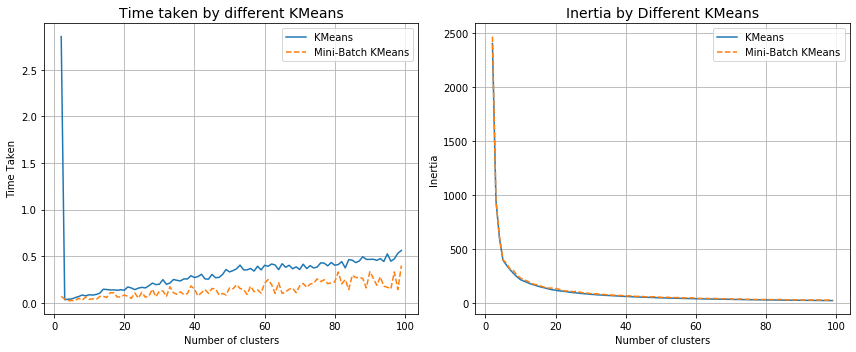

In [26]:
# Visualizing the data
plt.figure(figsize = (12, 5))
# Time
ax1 = plt.subplot(1, 2, 1)
ax1.plot(np.arange(2, max_clusters),kmeans_list[:, 0], label = "KMeans")
ax1.plot(np.arange(2, max_clusters), batch_list[:, 0],label = "Mini-Batch KMeans", linestyle = "--")
ax1.set_title("Time taken by different KMeans", fontsize = 14)
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Time Taken")
ax1.grid(True)
ax1.legend()

# Inertia
ax2 = plt.subplot(1, 2, 2)
ax2.plot(np.arange(2, max_clusters),kmeans_list[:, 1], label = "KMeans")
ax2.plot(np.arange(2, max_clusters), batch_list[:, 1],label = "Mini-Batch KMeans", linestyle = "--")
ax2.set_title("Inertia by Different KMeans", fontsize = 14)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Inertia")
ax2.grid(True)
ax2.legend()
save_fig("TimeTakenByDifferentKMeans")

The little experiment conducted in the above code and the data created is represented in visualiztion. Let's look at the observations from the data.

**Observations**
1) Time: It can be seen that the mini Batch KMeans algorithm performs a lot better as the number of clusters increase. It faster in most of the cases. 
2) Inertia: It ca be seen that at some cases, the Batch Kmeans has a slightly higher inertia than that of the normal KMeans. In this case, the difference does not seem to increase with the number of clusters as mentioned in theory. A larger tets size might be useful for this conclusion 

**Conclusions**
It can be concluded that the MiniBatchKMeans algorithm performs a lot faster with little to alost no trade - off in performance. As the number of clusters in question increases, the gap between time taken increases.

### Make an informed decision about the number of clusters to chose by following various metrics.
In this exercise, a random number is generated between the numbers of 2 and 50. It is required to make a judgement about the optimal number of clusters using different metrics.

In [22]:
# Data Creation
random_number = np.random.randint(low = 2, high = 50)
# Cluster number is set to be equal to random number
cluster_number = random_number

# Making Blobs
X, Y = make_blobs(2000, centers = cluster_number)

Saving figure RandomNumberOfClusters


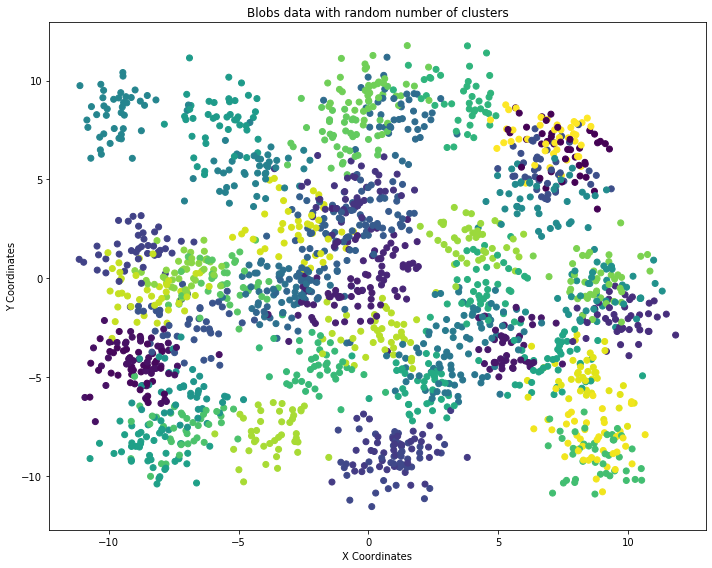

In [28]:
# Data Visualization 
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.title("Blobs data with random number of clusters")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
save_fig("RandomNumberOfClusters")

It is a bit hard to look at the data and say the number of clusters in the data. Three metrics will be considered for selecting the optimum number of clusters. 
1) Inertia 
2) Silhoutte Score & Coefficient
3) Data Visualization through Silhoutte coefficients for differnt cluster numbers in the region

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
# Inertia Graph for different cluster numbers
# Creating a new cluster KMeans for different number of clusters
maximum = 50
scores_list = np.empty((maximum-2, 1))
inertia_list = np.empty((maximum - 2, 1))
for cluster_number in range(2, maximum):
    # Normal KMeans
    kmeans = KMeans(n_clusters = cluster_number, n_jobs = -1)
    kmeans.fit(X)
    # Calculate the inertia 
    inertia_list[cluster_number-2]=kmeans.inertia_
    
    # Calculate the silhouette score
    labels = kmeans.labels_
    distances = kmeans.transform(X)
    scores_list[cluster_number - 2] = silhouette_score(distances, labels)
    

Saving figure InertiaForDifferentDimensions


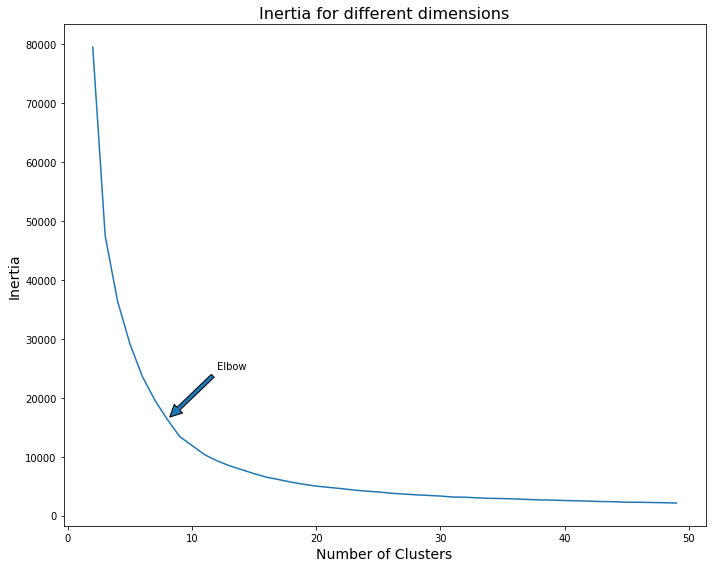

In [31]:
# Ploting the Inertia Graph
plt.figure(figsize = (10, 8))
plt.plot(np.arange(2, maximum), inertia_list)
plt.title("Inertia for different dimensions", fontsize = 16)
plt.xlabel("Number of Clusters", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)

# Annotate elbow
plt.annotate("Elbow", xy = [8, inertia_list[6]], xycoords = "data",
             arrowprops = {"shrink" :0.05}, xytext= [50, 50], textcoords = "offset points")
save_fig("InertiaForDifferentDimensions")

**Observations**
Looking at the graph, it is clear that the rate of decrease of inertia slows down around the nmber of clusters of 10(slightly lower than 10).SO an approximate range of values might be around 5 to 11.

Next, the silhouette scores will be analysed in coherence with the inertia data. Silhouette score is the mean of all the silhoutte coefficients of a clustering Model. A Silhouette coefficient is assigned to each instance on the basis of a small expression (b-a)/max(a, b) where a - The mean intra-cluster distance and b - The mean inter-cluster distance(to the cosest cluster).

Saving figure SilhouetteScoreForDifferentNumberOfClusters


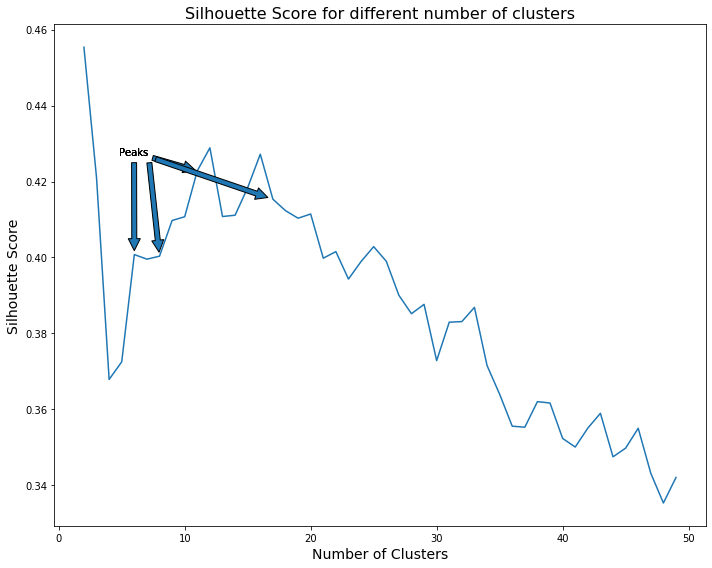

In [32]:
# Silhouette Score Graph
plt.figure(figsize = (10, 8))
plt.plot(np.arange(2, maximum),scores_list)
plt.xlabel("Number of Clusters", fontsize = 14)
plt.ylabel("Silhouette Score", fontsize = 14)
plt.title("Silhouette Score for different number of clusters", fontsize = 16)

# First Peak
plt.annotate("Peaks", xycoords = "data", xy =[6,scores_list[4]],
             textcoords = "axes fraction", xytext = [0.1, 0.74],
             arrowprops = {"width":5, "shrink":0.04})

# Second Peak
plt.annotate("Peaks", xycoords = "data", xy =[8,scores_list[6]],
             textcoords = "axes fraction", xytext = [0.1, 0.74],
             arrowprops = {"width":5, "shrink":0.04})

# Third Peak
plt.annotate("Peaks", xycoords = "data", xy =[11,scores_list[9]],
             textcoords = "axes fraction", xytext = [0.1, 0.74],
             arrowprops = {"width":5, "shrink":0.04})

# Fourth Peak 
plt.annotate("Peaks", xycoords = "data", xy =[17,scores_list[15]],
             textcoords = "axes fraction", xytext = [0.1, 0.74],
             arrowprops = {"width":5, "shrink":0.04})

save_fig("SilhouetteScoreForDifferentNumberOfClusters")

From the graph, we can clearly look at four peaks in the silhouette score. Remember, the higher the score, the more well defined the clusers are and hence the better. So, these points can be noted. The number of clusters of the peaks are 6, 8, 11, 17. Now a suitable range was established using the inertia scores. The range was 5 - 11, (8 as the elbow, +/- 3).
So, three points qualify for the points in teh range, 6, 8, 11. Now, the coefficients can help in seperating and helping in choosing a the optimum number.

In [33]:
# Training a Cluster model for each of the number of clusters
cluster_numbers = [6,8, 11, 17]
K_models = [KMeans(n_clusters = c).fit(X) for c in cluster_numbers]

In [34]:
# Silhoute scores for the models
silhouette_scores = [silhouette_score(k.transform(X),k.labels_) for k in K_models]

Saving figure SilhouetteDiagrams
Saving figure SilhouetteDiagrams
Saving figure SilhouetteDiagrams
Saving figure SilhouetteDiagrams


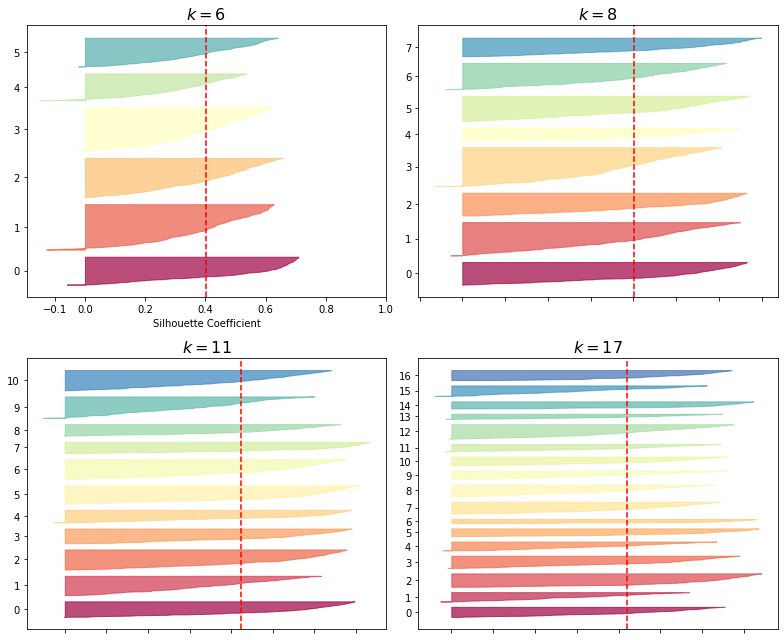

In [35]:
# Silhouette Diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for index, k in enumerate(cluster_numbers):
    plt.subplot(2, 2, index+1)
    
    y_pred = K_models[index].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[index], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    save_fig("SilhouetteDiagrams")

**Observations**
1) In k = 6 Silhouette diagram, some clusters have in them more instanes than other. Although, all of the cluster have a coeficient above the average. This is a very good sign. The silhouette score is also high but the placement on the inertia list is again at the edges. It is the first peak after a dip in silhouette score. It has does not have uniform cluster sizes while the peaks are aligned. In this case, the diversity in cluster sizes, and lower placement in the inertia range, bring it down to the second place. 

2) k = 8, Almost all of the clusters have more or less the same number of clusters. Every cluster is lies higher than than the silhouette score. Some clusters are margunally bigger than others, but the difference is very low. The merits are in the form of uniformity in the heights and low diversity in the cluster size. It also falls at the elbow of the inertia. This makes it at the most optimum position through inertia list. The de-merits are in the range of data, maximum size of cluster - minimum. But, the merits outewigh the demerits

3) k = 11, There are extremities in the cluster size and all the peaks do not reach as high as teh highest ones. Though all cross the threshold, there is a lot of inequality in distribution. This number of clusters has the highest silhouette score. But, there is a lot of diversity in the heights of teh cluster. The diversity in the number of instances per cluster is also a negative factor. 11 falls on the outermost regions of the elbow inertia list. The negative factos in the form of cluster size, heights of individual cluster and the place in inertia list outeigh the merits of highest combined silhouette score.

4) k = 17, Although all of peaks cross the throshild, there is bit of diversity among the peaks. But for the vast majority, the number of instances per group is almost the same (there is a little variation). Now, number of clusters = 17 has the second highest total silhouette score. It is not a very likely contender due to diversity in the peaks and a small tiny bit of diversity in the number of instances per cluster. The number of clusters is also out of range of the inertia contendors.


**Conclusion**
So, the number of clusters = 8 is chosen as the most optimum n_clusters value after considering the metric values of inertia, silhouette scores and coefficients. Let's look at the answer. 

In [36]:
# Print Predicted Answer
predicted_answer = "{0:20} : {1:1d} ".format("Predicted Answer", 8)
answer = "{0:20} : {1:1d}".format("Real Answer", random_number)
print(predicted_answer)
print(answer)

Predicted Answer     : 8 
Real Answer          : 47


Though the answer reached is way off mark, the answer reached had been reached through a logical manner. The error might have been due to not scaling the data well. This short coming can be overcome by easily scaling using MinMaxScaler or StandardScaler

### Tasks

### A semi-supervised learning using clustering must be used to propagate labels to all the instances
The aim of the task is to propagate labels to all the instances with the help of few starting labels and clustering algorithm. A Classification task must be performed on the final labelled instances. 

In [37]:
# Data - greyscale digits like MNIST
from sklearn.datasets import load_digits
digits= load_digits()

# Instances and Labels
X, y = digits["data"], digits["target"]

In [42]:
# Split the data into test and train sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train , X_test, y_train , y_test = train_test_split(X, y)

In [43]:
# Bench Mark 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fit
benchmark = log_reg.fit(X_train, y_train)

# Finding the accuracy
benchmark_preds = benchmark.predict(X_test)
benchmark_acc = accuracy_score(y_test, benchmark_preds)
print(benchmark_acc) # 0.96 accuracy 

0.9711111111111111


C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Now, the clustering must be performed on the train X set. The points closest to the cluster centers must be chosen as representative of the entire cluster. The labels for these points must be assigned to all the points in the cluster.

In [44]:
# Performing Clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 50) # Though only 10 digits present, there are many ways of writing the same digit

# Fit the X_train set
X_distances = kmeans.fit_transform(X_train) 
cluster_centers = kmeans.cluster_centers_



In [45]:
cluster_centers.shape

(50, 64)

In [46]:
# get the points closest to the cluster centers
closest_points_ind = np.argmin(X_distances, axis = 0)

Saving figure DigitsDataset


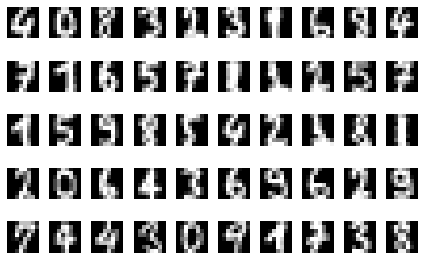

In [49]:
# The image data of these closest points
images_closest_points = X_train[closest_points_ind]

# Showing 10 images together in a row
for index, images in enumerate(images_closest_points):
    ax = plt.subplot(5,10, index+1)
    plt.imshow(images.reshape(8, 8), cmap ="gray")
    plt.axis("off")
save_fig("DigitsDataset")

In [50]:
# Labeling all the instances manually
labels_closest_points = np.array([9, 2, 0, 4, 5, 7, 6, 6, 9, 8, 2, 1, 5, 1, 2, 6, 0, 7, 4, 3, 2, 3, 8, 8, 3, 0, 8, 7, 4, 
                                 5, 8, 9, 9, 8, 1, 5, 4, 9, 1, 4, 4, 6, 2, 5, 3, 1, 1, 7, 3, 1])

In [51]:
# Labelling all the instance with the cluster representation image label
# Cluster labels for X_train
X_train_cluster_labels = kmeans.labels_

# If the cluster label of an instance is 7, the label in 7th index in the labels_closest must 
# be taken 
cluster_y_train = np.empty((len(X_train)))
for i in range(50): # For all insances with cluster label i
    instance_mask =( X_train_cluster_labels == i)
    cluster_y_train[instance_mask] = labels_closest_points[i]

# All instances are labelled

In [52]:
# Now training a logistic regression on this data
label_all_log = LogisticRegression()
label_all_model = label_all_log.fit(X_train,cluster_y_train)

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
# Evalutating on test set
label_all_preds = label_all_model.predict(X_test)
label_all_acc = accuracy_score(y_test, label_all_preds)
print(label_all_acc) # 91.3 Percent is very high considering we started off with 50 manualy 
# labelled data

0.08


### Performing a GridSearch to find the most optimum nuber of clusters for the dataset
The aim is to use clustering as a preprocessing dimensionality reduction step and use the transformed distances to perform training. The number of clusters with the least accuracy error is the optimum solution. When unsupervised algorithms are used as preprocessing steps, they can be evaluated on the performance of supervised task.

In [54]:
# Loading the data again
# Split into training and test set
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits["data"], digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
# Writing a pipeline to combine dimensionality reduction using clustering
# and score using LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message = "^internal gelsd")



# Remember this is multiclass classification so multiclass must be ovr or polynomial
# Pipeline 
opt_clusters = Pipeline([
    ("k_means", KMeans()), 
    ("log_reg", LogisticRegression(solver = "lbfgs", multi_class = "ovr"))
])

In [56]:
# Parameters Grid
params_grid = {
    "k_means__n_clusters":np.arange(30, 100)
}
# Grid Search
opt_clusters_grid = GridSearchCV(opt_clusters, params_grid, cv = 3, scoring = "accuracy")

# Grid Fit
opt_clusters_grid.fit(X_train, y_train)

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('k_means',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                    

In [57]:
opt_clusters_grid.best_params_ # Number of clusters = 95

{'k_means__n_clusters': 48}

In [58]:
def sorted_results(cv_results, reverse = True):
    """
    This function sorts the cv_results test score in descending order by default but can be changed by calling 
    reverse = False
    """
    test_scores = cv_results["mean_test_score"]
    indices = np.argsort(test_scores)[-1::-1]
    sorted_test_score = test_scores[indices]
    cv_params = cv_results["params"]
    return sorted_test_score, [cv_params[i] for i in indices]
    

def display_scores(results, reverse = True):
    """
    This function displays the sorted results and the parameters in the required order 
    """
    cv_results = results.cv_results_
    test_scores, params = sorted_results(cv_results, reverse = reverse)
    print("{0:5} {1}".format("SCORE : ", "PARAMS"))
    print("*"*100)
    for score, params in zip(test_scores, params):
        print("{0:5} : {1:}".format(score, params))
    print("*"*100)

In [59]:
opt_clusters_grid.best_estimator_.score(X_test, y_test) # What? the best model performs at a staggerning performance of 
# 98.6% for being reduced using clustering

0.98

### Image Segmentation
Image Segmentation is the process of sementing image. It is usually done in two different ways, 1) Semantic Segmentation in which each individal pixel is assigned the label of the object it belongs to 2) Instance Segmentation in which each pixel **belonging to an object** is assigned the label of an individual image. 

The aim in this task is to perform color semgentation in which the all the instances belonging to a cluster are given the same color of as the cluster center.

In [60]:
# Downloading the lady bug image
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
path = os.path.join(".", "Images", filename)
URL = os.path.join(DOWNLOAD_ROOT, "images/unsupervised_learning/"+filename)
# Downloading
urllib.request.urlretrieve(URL, path)

('.\\Images\\ladybug.png', <http.client.HTTPMessage at 0x1dbce7b1248>)

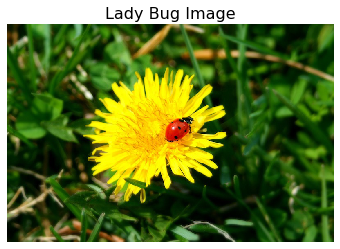

In [61]:
# Now show the image
ladybug_data = plt.imread(path)
# Show the orignial image
plt.imshow(ladybug_data)
plt.axis("off")
plt.title("Lady Bug Image", fontsize= 16)
plt.show()

There are a variety of colors present but the most dominant ones are yellow, green, red, black. Lets use Color Segmentation to assign the color of the cluster center to all the instances in the cluster.

In [62]:
# Convert the ladybug data into 2D
ladybug_data = ladybug_data.reshape(-1, 3)

In [63]:
# Saving the shape
ladybug_shape = plt.imread(path).shape
ladybug_shape

(533, 800, 3)

In [65]:
# Writing the program
image_data_list = []
for clusters in range(2, 11):
    kmeans = KMeans(n_clusters = clusters, n_jobs = -1)
    kmeans.fit(ladybug_data)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    copy_lady = ladybug_data.copy()
    # Now assign the value of the center to all the instances
    for cluster_index in range(len(cluster_centers)):
        index_mask = (labels == cluster_index)
        copy_lady[index_mask] = cluster_centers[cluster_index]
    # Append Data
    image_data_list.append(copy_lady)

    

Saving figure semantic_clustering


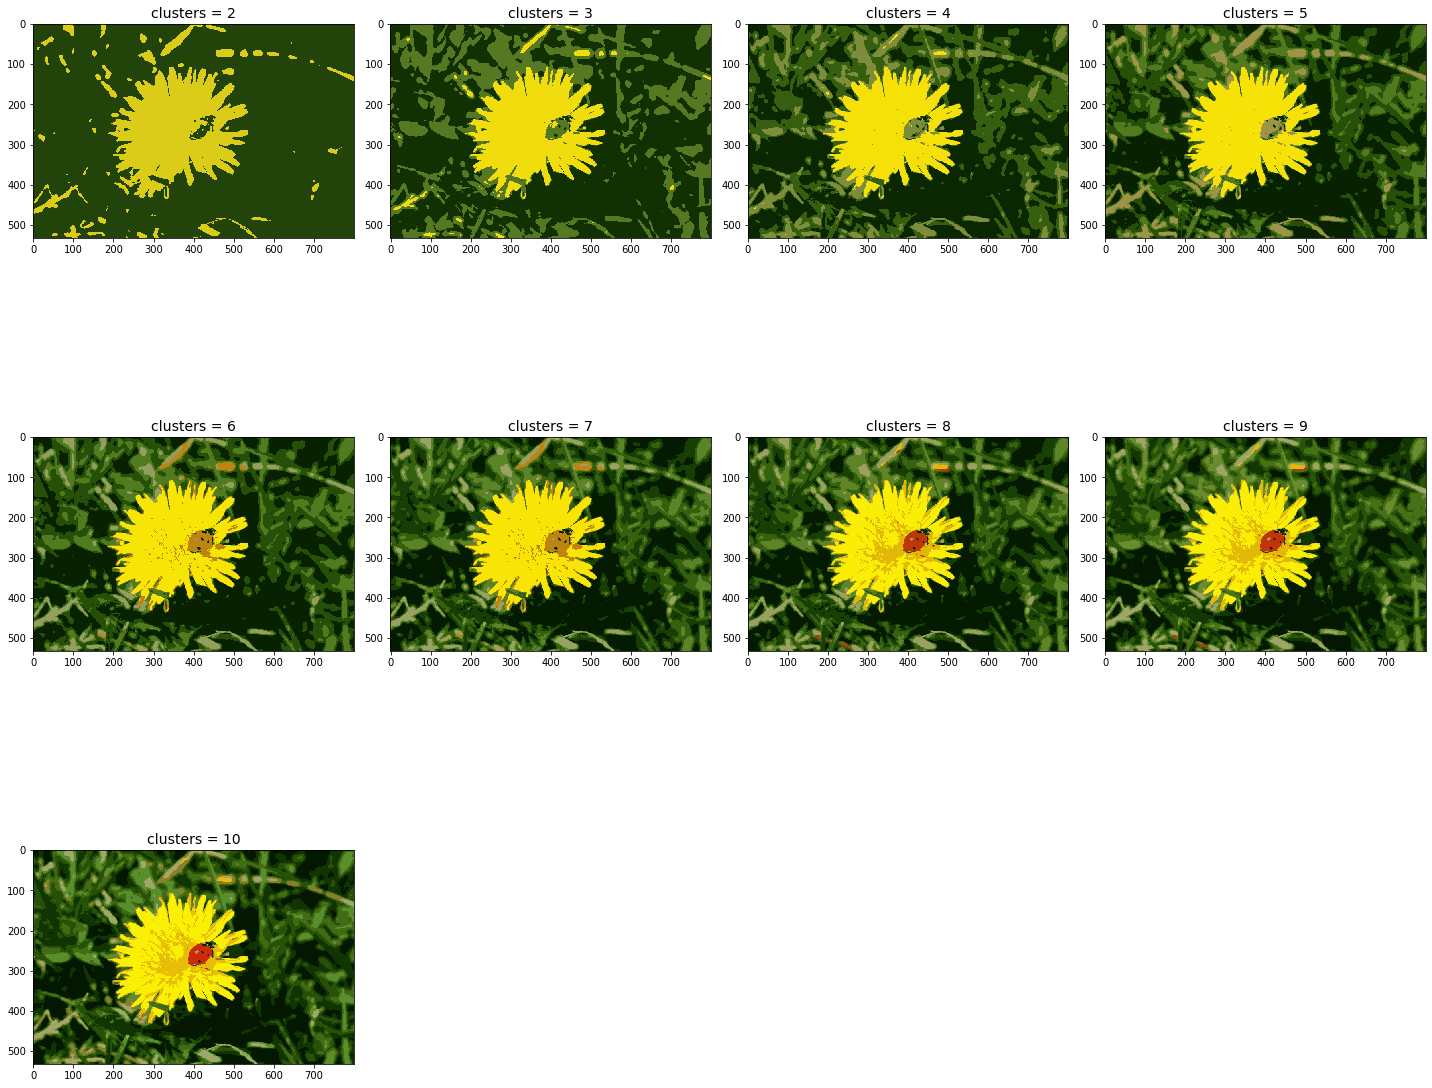

In [66]:
# Ploting algorithm 
plt.figure(figsize = (20, 18))
for index, data in enumerate(image_data_list):
    ax = plt.subplot(3, 4, index+1)
    ax.imshow(data.reshape(ladybug_shape))
    ax.set_title("clusters = "+str(index+2), fontsize = 14)
save_fig("semantic_clustering")

Text(0.5, 1.0, 'My Photo')

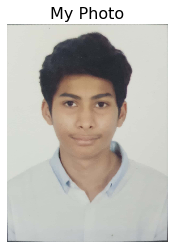

In [67]:
# Performing the same program on my photo
# Laod the photo
folder = "C:/Users/bella/Desktop/Krishna"
my_photo = os.path.join(folder, "KannaPhoto.jpg")

# Imread
my_photo_data = plt.imread(my_photo)
# Showing my photo
plt.imshow(my_photo_data)
plt.axis("off")
plt.title("My Photo", fontsize = 16)

In [68]:
# Performing Color Segmentation
# First save the shape of the image
my_shape = my_photo_data.shape

In [69]:
# Convert the image data to 2D
my_photo_data = my_photo_data.reshape(-1, 3)

In [70]:
# Color Segmentation
my_photo_list = []
for cluster in range(2, 10):
    kmeans = KMeans(n_clusters = cluster, n_jobs = -1)
    kmeans.fit(my_photo_data)
    # Cluster Labels 
    labels=kmeans.labels_
    centers = kmeans.cluster_centers_
    copy_data = my_photo_data.copy()
    # Replace every pixel in a cluster with the center
    for label in range(len(centers)):
        mask = (labels == label)
        copy_data[mask] = centers[label]
    my_photo_list.append(copy_data)

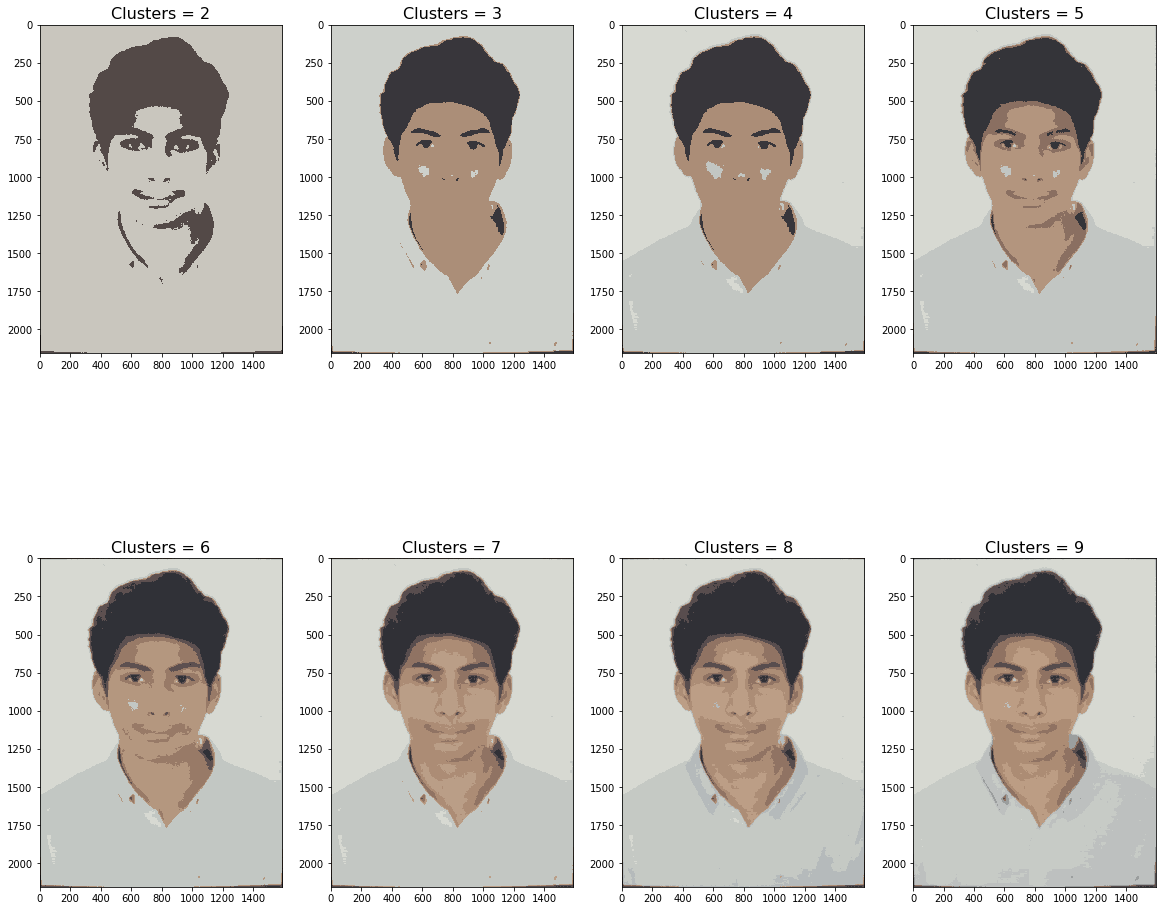

In [71]:
# Plotting
plt.figure(figsize = (20, 18))
for index, data in enumerate(my_photo_list):
    ax = plt.subplot(2,4, index+1)
    ax.imshow(data.reshape(my_shape))
    ax.set_title("Clusters = "+str(index+2), fontsize = 16)
    

### Perform Percentile Semi-Supervised Learning
The aim of the exercise is to create a new label set with labels for instances with high degree of certainty. This greatly improves the quality of data and hence also the classification task that ensues. 

The process - 
1) Use a clustering algorithm to find cluster centers
2) Finding all the points within a certain distance thereshold for each cluster
3) All the points in step two are given the label of the cluster center
4) About the required percentile of the dataset is label propagated (if 20, 20% of entire data is labelled)

In [72]:
# Importing modules
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [73]:
# Loading Data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits["data"]
y = digits["target"]



In [74]:
# Using Standard Scaler to Scale the data
ss = StandardScaler()
X= ss.fit_transform(X)

In [75]:
# Split in to sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
# Shapes
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [77]:
# STEP 1
# Running the cluster algorith with 58 cluster centers
kmeans = KMeans(n_clusters = 58, n_init = 20)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=58, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
# Distances and closest points 
X_distances = kmeans.transform(X_train)
closest_points_index = np.argmin(X_distances, axis = 0) # assumed cluster centers
# Labels of the clusters using these points
y_label_cluster = y_train[closest_points_index] # This array has all the labels for cluster

In [79]:
# STEP 2
distance_to_cluster = X_distances[np.arange(len(X_train)), kmeans.labels_]
percentile = 30
# Writing a loop which assigns all the ditances values above threshold 
# distances as -1
X_copy = X_train.copy()
for k in range(58):
    in_cluster = (kmeans.labels_ == k)
    threshold = np.percentile(distance_to_cluster[in_cluster], percentile)
    above_threshold = distance_to_cluster > threshold
    distance_to_cluster[(above_threshold)&(in_cluster)] = -1
    

In [80]:
# STEP 3
# Points for semi-supervised
percentile_mask = (distance_to_cluster!=-1)
X_semi = X_train[percentile_mask] # Contains all the X_train elements which are to be labeled
y_semi = y_label_cluster[kmeans.labels_[percentile_mask]]

In [81]:
# STEP 4
log_reg = LogisticRegression(solver = "lbfgs", multi_class = "ovr")
log_model = log_reg.fit(X_semi, y_semi)

In [82]:
# Evaluate on the test set
log_model.score(X_test, y_test) # 83.7% Accuracy Percent Accuracy 

0.9177777777777778

In [83]:
# lets look at how accuracy the percentile predictions are

acc = accuracy_score(y_train[percentile_mask], y_semi)
print(acc)# 98% of all the predicted values are right

0.9712918660287081


The accuracy is up by about 10 percent with using the clustering algorithm. 83% is the base where as using the percentile it is up to 92%.

In [84]:
# Full Set

In [85]:
# Base line with 58 labeled instances
X_label = X_train
y_label = y_train
log_reg = LogisticRegression(solver = "lbfgs", multi_class = "multinomial")
log_model = log_reg.fit(X_label, y_label)

In [86]:
log_model.score(X_test, y_test) # 96.8% 

0.9711111111111111

In [87]:
# 58 instances only 
X_label = X_train[:58]
y_label = y_train[:58]
log_reg = LogisticRegression(solver = "lbfgs", multi_class = "multinomial")
log_model = log_reg.fit(X_label, y_label)
log_model.score(X_test, y_test) # 82%

0.7977777777777778

### Other Clustering Algorithms
These are some additional algorithms mentioned in the book . Implementation of these algorithms is the aim of the exercise. It is also informative to compare their performances. This will be done in the following code. The algorithms are
1) Spectral Clustering
2) Mean Shift Clustering
3) BIRCH clustering
4) Affinity Clustering 
5) Agglomerative Clustering
This will be performed on the moons dataset.

In [88]:
# Data
from sklearn.datasets import make_moons
X, y = make_moons(2000, noise = 0.04)

In [89]:
# Importing the required datasets
from sklearn.cluster import SpectralClustering,AffinityPropagation, AgglomerativeClustering, MeanShift, Birch, DBSCAN

spc_rbf, spc_nn = SpectralClustering(), SpectralClustering(affinity = "nearest_neighbors")
# Training spectral cluster seperately
spc_list = [spc_rbf, spc_nn ]
for spc_alg in spc_list:
    spc_alg.fit(X)

C:\Users\bella\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Saving figure SpectralClustering


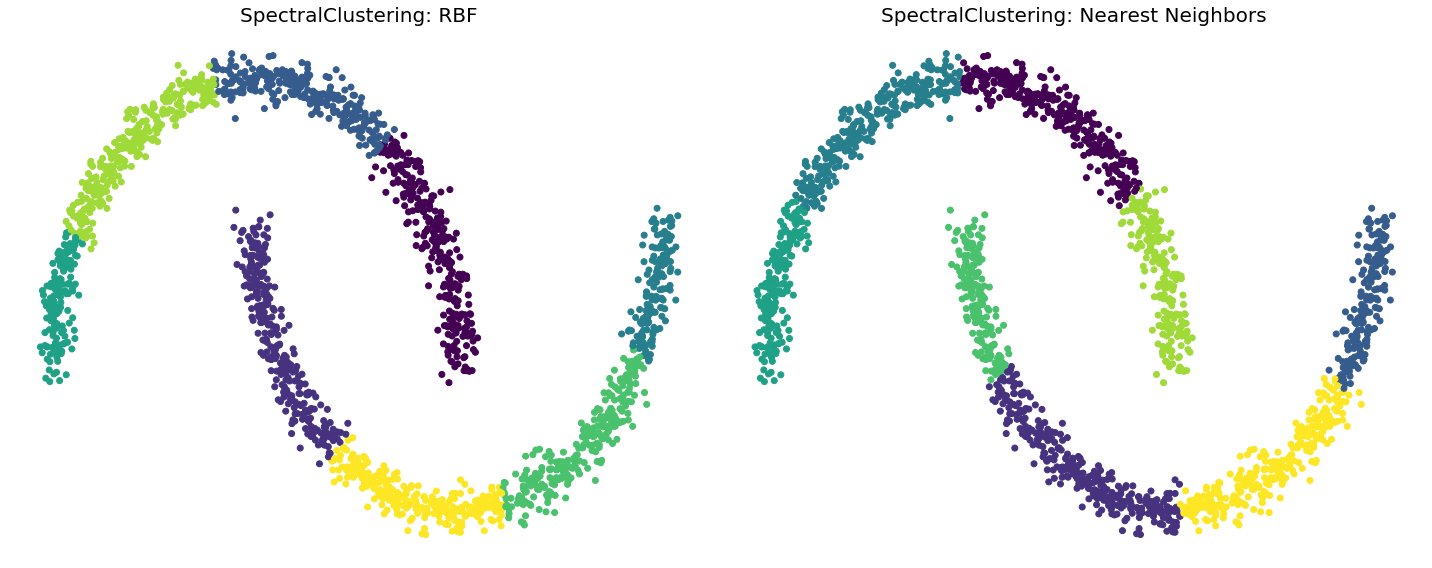

In [90]:
# Plotting the SpectralClustering clusters
%matplotlib inline
titles = ["RBF", "Nearest Neighbors"]
plt.figure(figsize=(20, 8))
for index, spc_alg in enumerate(spc_list):
    ax = plt.subplot(1, len(spc_list), index+1)
    ax.scatter(X[:, 0], X[:, 1], c = spc_alg.labels_)
    ax.set_title(spc_alg.__class__.__name__+": "+ titles[index], fontsize = 20)
    ax.axis("off")
save_fig("SpectralClustering")

**Observations**
In the RBF kernel, it can be seen that there are two big clusters in the center, where as in Nearest Neighbours, these are divided into smaller parts. The performance of both of these kernels is very similar. The general trend is that Nearest neighbours finds smaller clusters while RBF finds bigger clusters.

In [91]:
# Other algorithms list
birch = Birch()
mshift = MeanShift()
aff_propagation = AffinityPropagation()
agglo = AgglomerativeClustering()
dbs = DBSCAN()
other_algs_list = [birch, mshift, aff_propagation, agglo, spc_rbf, dbs]

In [92]:
# Clustering using the algorithms and displaying the resuts
import time
time_list = []
for alg in other_algs_list:
    t0 = time.time()
    alg.fit(X)
    t1 = time.time()
    time_list.append(t1-t0)

C:\Users\bella\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Saving figure AllClustering


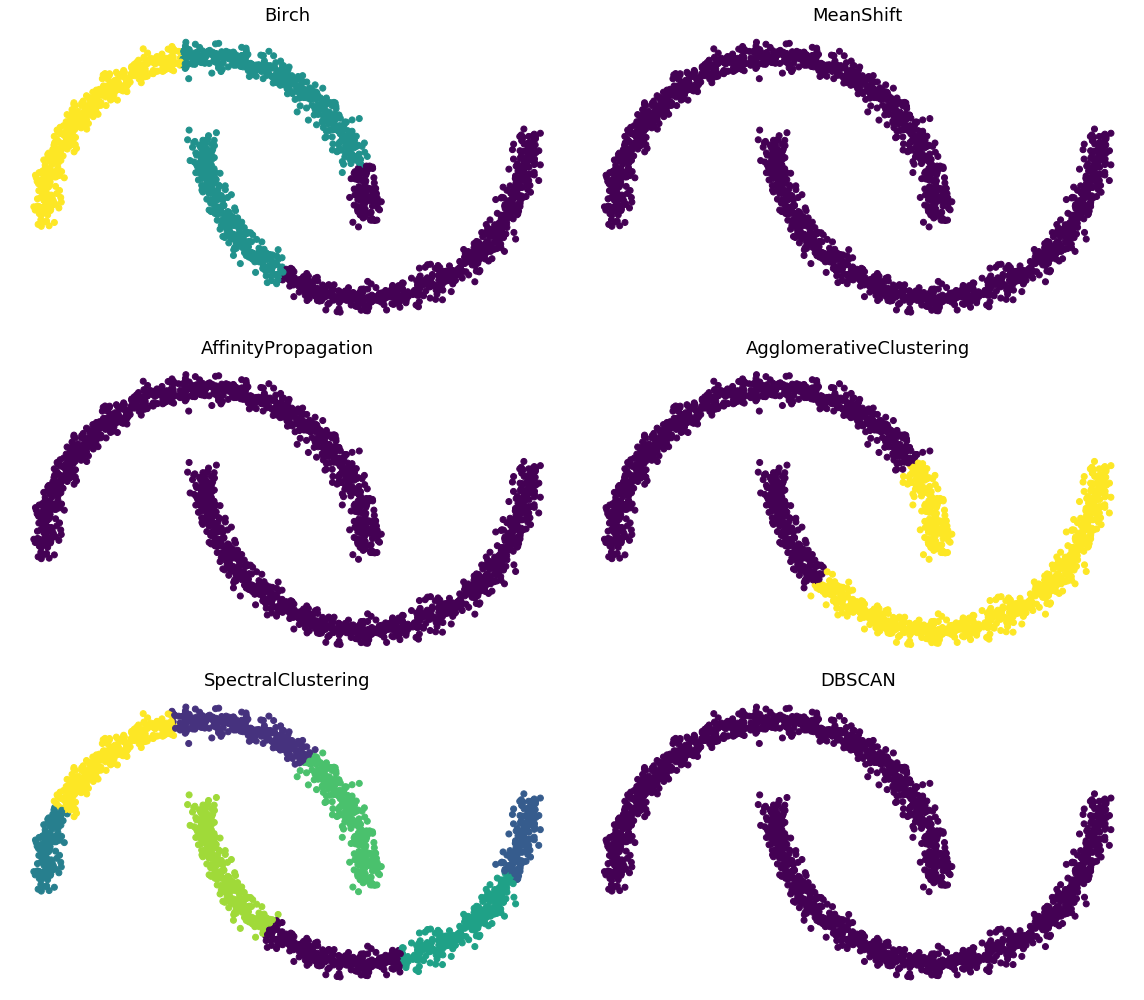

In [93]:
# Ploting
plt.figure(figsize=(16, 14))
for index, alg in enumerate(other_algs_list):
    ax = plt.subplot(3, 2, index+1)
    ax.scatter(X[:, 0], X[:, 1], c = alg.labels_)
    ax.set_title(alg.__class__.__name__, fontsize = 18)
    ax.axis("off")
save_fig("AllClustering")

**Observations**
It was observed that MeanShift algorithm and Affinity Propagation algorithm converged into one big cluster. This might be because of the default radius of MeanShift and Affinity Propagation. But, it can be roughly stated that, Affinitiy and MeanShift work best for situations in which there are regions of high continuous density seperated by areas of lower density 

Interstingly, Birch forms three clusters. It identifies the first cluster well (more or less) but divides the next cluster into two. 

Spectral Clustering on the other hand divides the data into 8 clusters. So, it can be said that it is good in observing small changes. As the default implementation of spectral clustering uses the distances sparse matrix for dimensionality reducution, some information must have been lost. 

The final winner for this round is Agglomerative Clustering which more or less find the best way to split the dataset. It is good in understanding small changes in density while also not very sensitive to noise. 

Saving figure TimeTaking


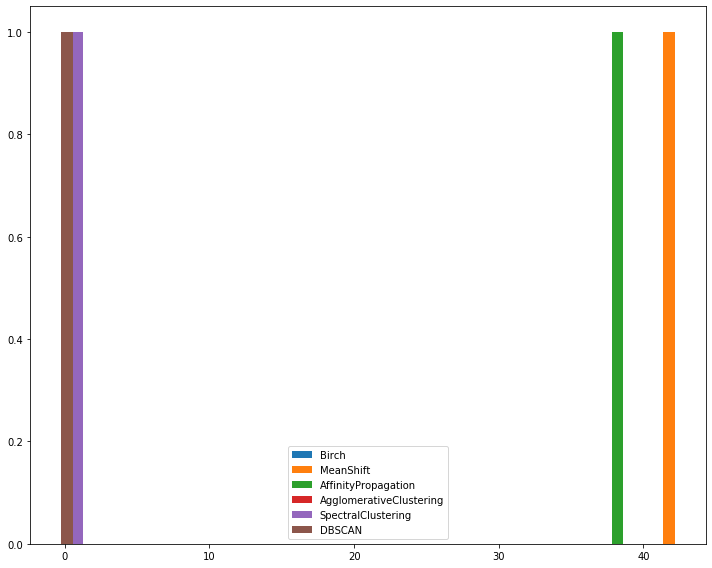

In [94]:
# Time taking or Computational Complexity
fig, ax = plt.subplots(figsize=(10, 8))
for time, alg in zip(time_list, other_algs_list):
    ax.bar(time, np.linspace(0, 1, 5), label = alg.__class__.__name__)
    ax.legend()
save_fig("TimeTaking")

**Observations**
It is clear that Mean Shift and Affinity Propagation take a lot of time (as both are proportional to $m^2$). The fastest appear to be Birch and Agglomerative Clustering which do well on large datasets. Spectral Clustering comes under a close second. So, the complexities can easily be remembered.

## DBSCAN
DBSCAN is a very simple yet powerful tool which achieves the result very easily. DBSCAN clusters using local density. It counts the number of points are present around an instance. If the number is higher than min_samples, the instance is called a core sample. A Continuous stri gof these core sample points form a cluster. The point with no core instances in the neighbourhood(distance to check), the point is labelled as an outlier. It is good for outlier detection.

### Make a predictor classifier for DBSCAN and make an outlier detector. 
DBSCAN does not have a predict method and hence can not predict the cluster of a new instance. So, a custom classifier must be built to perform this job. The same predictor can be used for outlier detection. 

In [95]:
# DBSCAN
# Usually KNeighbours alg is used for classification
from sklearn.neighbors import KNeighborsClassifier
db_clf = KNeighborsClassifier()

In [96]:
# Train and fit the DBSCAN clustering on moons dataset
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.1)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

No handles with labels found to put in legend.


Saving figure DBSScan


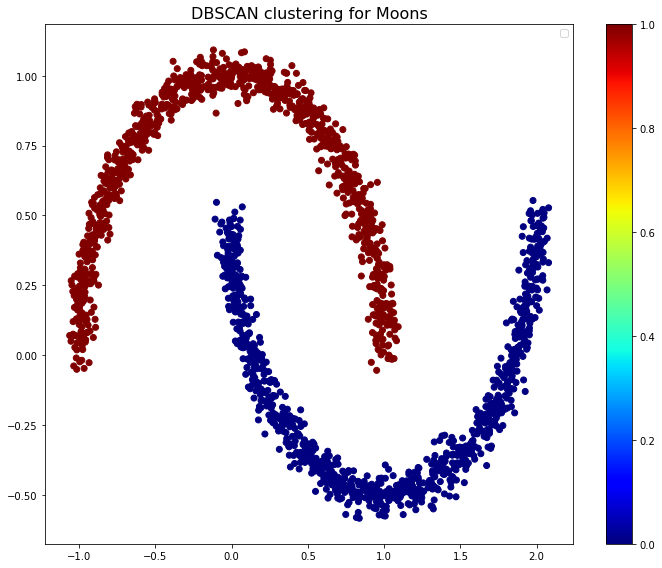

In [99]:
# Ploting the clustering
# With low noise
plt.figure(figsize = (10, 8))
plt.scatter(X[:,0], X[:,1], c = dbs.labels_, cmap = mpl.cm.get_cmap("jet"))
plt.colorbar()

plt.title("DBSCAN clustering for Moons", fontsize = 16)

#plt.scatter(new_array[:, 0], new_array[:, 1], marker = "+", s = 500, c = "red", label = "New Points")
plt.legend()
save_fig("DBSScan")

In [100]:
# Methods using DBSCAN
labels = dbs.labels_
# Core instances
core_instances = dbs.components_
# Indices of core instances
core_instances_ind = dbs.core_sample_indices_

There are no outliers in the data. So, if an instance is provided, a class is always predicted. So, a control for distances must be set to detect outliers. 

In [101]:
# Training the KNN Classifiers for prediction
# Not considering outliers
db_model  = db_clf.fit(core_instances, labels[core_instances_ind])

In [105]:
# Making an outlier predictor
# KNN neighbours is suited because of the following feature
new_array = np.array([[0.1, 1], [0.5, 0.4], [-0.3, 0.3]])


In [108]:
# Outlier detector
y_distances, y_indices = db_clf.kneighbors(new_array, n_neighbors = 1)# Returns nearest neighbour
y_pred = labels[y_indices]
y_pred[y_distances > 0.1] = -1
print(y_pred)

[[ 1]
 [-1]
 [-1]]


This can be seen in the plot where the two of the new points are ouliers and one point lies in the class 1

### Plotting Core instances of a DBSCAN 
(The aim of the exercise is to understand visually how a cluster is formed in the DBSCAN model)

In [109]:
# New X with higher noise
X, y = make_moons(2000, noise = 0.15)

In [110]:
# New DBS
dbs = DBSCAN(eps= 0.07)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.07, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Saving figure DBS_core_cluster


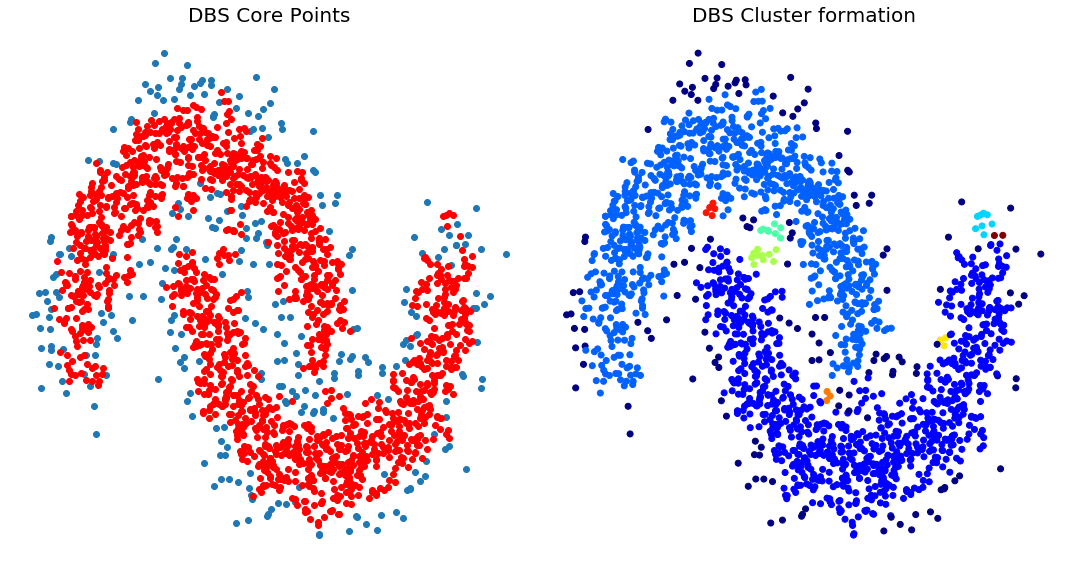

In [111]:
# Ploting core Instances
core_instance_ind = dbs.core_sample_indices_
core_instances = X[core_instance_ind]
normal_mask = np.ones(len(X),dtype = bool)
normal_mask[core_instance_ind] = False
normal_instances = X[normal_mask]

# Plot
plt.figure(figsize=(15, 8))
ax= plt.subplot(1, 2, 1)
ax.scatter(normal_instances[:, 0], normal_instances[:, 1])
ax.scatter(core_instances[:, 0], core_instances[:, 1], c = "red", marker = "o")
ax.set_title("DBS Core Points", fontsize = 20)
ax.axis("off")

# Plot the clusters
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X[:, 0], X[:, 1], c= dbs.labels_,  cmap = mpl.cm.get_cmap("jet"))
ax2.set_title("DBS Cluster formation", fontsize = 20)
ax2.axis("off")
save_fig("DBS_core_cluster")
#plt.show()

Core points are the points with more than minimum samples of points in their neighbourhood. These are represented as the red points in the data. We can see how a continuation of these points form the clusters.  This is how the clusters are formed in the data. 

In [112]:
# An elegent way to form a compliment of a set
array = np.arange(10)
indices = np.linspace(0, 9, 3).astype(int)
print(indices)

[0 4 9]


In [113]:
# If the compliment of this set is to be formed
compliment_mask = np.ones(10, dtype = bool)
compliment_mask[indices] = False
# Printing compliment
print(array[compliment_mask])

[1 2 3 5 6 7 8]


## Bayesian Gaussian Mixture models
Bayesian Guassian Mixture use the Bayes model along with the assumption that all the instances are formed by a number of gaussian models combined. The number of gaussian models is unknown and the parameters are unknown. The Bayesian Gaussian Mixture model takes in a number of componenets which we are confident that is higher than the actual number of clusters. This model reduces the coefficients unrequired models to 0 or close to zero. The advantages of the model are - 
1) It is very efficient in identifying ellipsoid type of data
2) It gives a good idea about the optimal number of clusters, when some idea about the problem is known.

The disadvantages are that it tends to fall into local minima and the default number of iterations is 1, so the nuber of iterations must be increased.

The aim of the exercise is to use the BayesianGaussianMixture class on the moons dataset and understand the limitations of the model. (Its incapability of identifying ellipsoids only). The secondary aim is to understand how to plot a contour map for a model. 

In [114]:
# Data
from sklearn.datasets import make_moons
X, y = make_moons(2000, noise = 0.1)

In [115]:
# Using the Bayesian Gaussian Mixture to fit the data
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10)

In [116]:
# Using it to fit the dataset
bgm.fit(X)

C:\Users\bella\anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

Saving figure MeshGrid


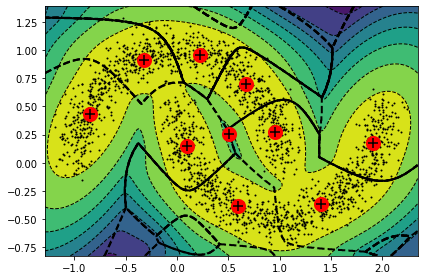

In [117]:
# Plotting a Contour map for the Bayesian Gaussian Model
from matplotlib.colors import LogNorm

resolution = 1000

# STEP 1 - Building a mesh grid first
mins = X.min(axis = 0)-0.1 # Two columns/features
maxs = X.max(axis = 0)+0.1 # Two columns (Slightly higher margin than max)
# The meshgrid takes in an array with vector coordinates to form a coordinate matrix
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
# These meshgrid cover each point in the resolution grid 

# STEP 2 - Get the cluster score for all the points shown in meshgrid
mesh_grid = np.c_[xx.ravel(), yy.ravel()]
Z = bgm.score_samples(mesh_grid)
Z = Z.reshape(xx.shape) # Reshaping for contour fill

# STEP 3 - Build the Contour map using the mesh grid and the Z (density estimations at points)
plt.contourf(xx, yy, Z,)
plt.contour(xx, yy, Z,
                linewidths=1, colors='k')

# Predictions
Z = bgm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,
                linewidths=2, colors='black', linestyles='dashed')
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


# Plotting the centroids 
centroids = bgm.means_
weights = bgm.weights_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker = "o",linewidths = 8, zorder = 10, 
            s = 50, c = "r")
plt.scatter(centroids[:, 0], centroids[:, 1], 
           marker = "+", linewidths = 10, zorder = 11, 
           s= 100, c = "black")
save_fig("MeshGrid")

In [118]:
def plot_contour(estimator, X, resolution = 1000, axis = None):
   
    
    # Find out the max and minimum - to decide the mesh grid cordinats
    maxs = X.max(axis = 0)+0.1 # Column wise - 2
    mins = X.min(axis = 0)-0.1
    # STEP 1 - Mesh Grid and density preds at each point
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    # Density scores at each point
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = estimator.score_samples(mesh)
    Z = Z.reshape(xx.shape) # Reshaping for contour
    
    # STEP 2 - Contour for density
    plt.contourf(xx, yy, Z, 
               )
    plt.contour(xx, yy, Z, 
               linewidths = 1, colors = "k")
    
    # Contours for Labels
    predictions = estimator.predict(mesh)
    plt.contour(xx, yy, predictions.reshape(xx.shape), colors = "red", 
               linewidths = 3, )
    
    # STEP 3 - Plot the means 
    means = estimator.means_
    plt.scatter(means[:, 0], means[:, 1], marker = "o",
             zorder = 10, s = 30, linewidths = 8, color = "k")
    plt.scatter(means[:, 0], means[:, 1], marker = "+", 
            zorder = 11, s = 100, linewidths = 10, color = "black")
    
    
    # Plot the points 
    plt.scatter(X[:, 0], X[:, 1], s = 8)
    
    
    # Labelling
    plt.xlabel("$x_1$", fontsize = 14)
    plt.ylabel("$y_1$", fontsize = 14)
    
        
    
    plt.axis("off")

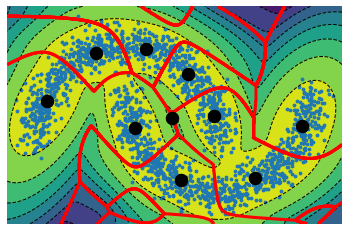

In [119]:
plot_contour(bgm, X)

**Observations**
As we observe, the moons dataset is divided into 9 clusters which are rougly epsilloid in shape. This is a limitation of the Gaussian Mixtures. They assume the instances are formed from a mixture of gaussian normal distributions and hence are largely limited to these shapes. Hence, this is a limitation of the **Bayes Gaussian Mixture** model.

### Using the EllipticEnvelope Class
Elliptic Envelope class is used for outlier detection. This is an improvement to the GaussianMixture as Gaussian Mixture tends to even fit the outliers. Elliptic Envelope algorithm on the other hand fits the data which is strictly in an epsiloid shape and counts the other instances as ouliers. It assumes that the data comes from only one Gaussian Mixture.


The aim of the exercise is to get familiar with class. 

In [120]:
# Make moons dataset with a bit of noise
X, y = make_moons(2000,noise = 0.2)

In [121]:
# Importing class
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope()

In [122]:
# Fiting the Moons dataset to the GM
ee.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

Saving figure EllipticEnvelope


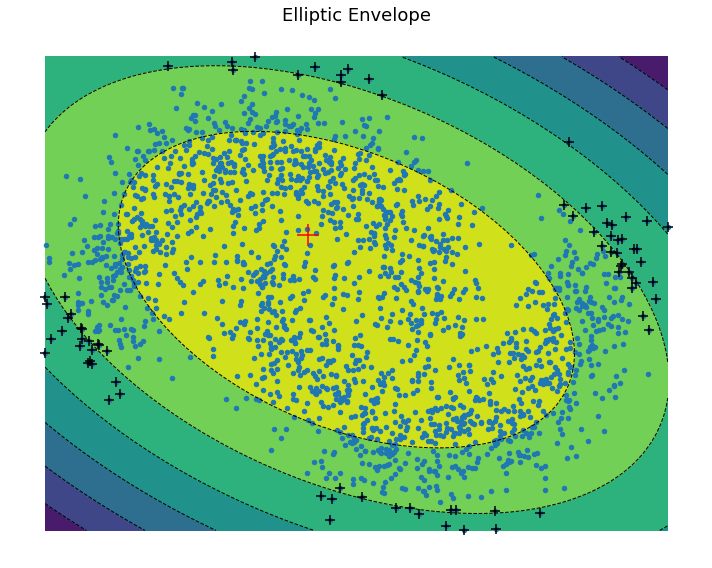

In [123]:
# Ploting a Density Map
plt.figure(figsize = (10, 8))
# Manually
mins = X.min(axis = 0)
maxs = X.max(axis = 0)

# Mesh grid 
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),np.linspace(mins[1], maxs[1]) )

# Making the density predictions at all the points 
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = ee.score_samples(mesh)
Z = Z.reshape(xx.shape)

# Making the contour
plt.contourf(xx, yy, Z)
plt.contour(xx, yy, Z, linewidths = 1, colors = "k")

# Plotting the cluster boundaries
#predictions = ee.predict(mesh)
#preds = predictions.reshape(xx.shape)
#plt.contour(xx, yy, preds)

# Outliers 
densities = ee.score_samples(X)
percentile  = 4
threshold = np.percentile(densities, percentile)
outlier_mask = densities<threshold

# Plotting all the points
plt.scatter(X[:, 0], X[:, 1], marker= "o", s = 20)
plt.scatter(((maxs[1]+mins[1])/2), ((maxs[0]+mins[0])/2), marker = "+", s = 500, c = "r")

# Plotting Outliers
plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1], marker = "+", c = "black", s = 100)

# Labellng
plt.axis("off")
plt.title("Elliptic Envelope", fontsize = 18)
save_fig("EllipticEnvelope")
#plt.show()

**Observations**
In this Density Map, we can only see the contour of one Normal distribution. So, it can be concluded that the model assumes that the mixture is coposed of only one Gaussian Normal Distribution. The points marked by "+" sign in the pictue are outliers. This has been decided by using the densities and using a umpy percentile to chose outliers. It can be seen the farthest points to the center are coonsidered as outliers.

## Gaussian Mixture Model
Gaussian Mixture model is a model which assumes that all the instances are formed by a combination of Gaussian normal distributions. In the normal Gaussian Mixture model, the number of gaussian models involved (or clusters) is mentioned. The problem is set this way, the outcomes (assumed to be gaussian) are known, what are the most likely parameters of mean, covariance, and weights(mixing coefficients)? The Gaussian mixture class performs this. The numebr of iterations is set at 1 by default, and must be changed. 

The aim of the exercise is to get familiar with the GaussianMixture classof sklearn

In [124]:
# Importing the Gaussian Mixture algorithm
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 10, n_init = 10)

In [125]:
# Fiting the moons dataset
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [126]:
# Using the density map plot
plot_contour(gm, X, figsize = (10,8))
ax = plt.gcf().gca()
# Outliers 
densities = gm.score_samples(X)
threshold= np.percentile(densities, 4)
outlier_mask = gm.score_samples(X)<threshold
ax.scatter(X[outlier_mask, 0], X[outlier_mask, 1], marker = "+", s = 200,
          c = "black")


TypeError: plot_contour() got an unexpected keyword argument 'figsize'

The plot function uses the score_sample, predict functions of estimators. So, gaussian Mixture has these functions. 

In [ ]:
covariance_1 = "tied"
covariance_2 = "spherical"
plt.figure(figsize = (12, 8))
for index, covariance in enumerate([covariance_1, covariance_2]):
    gm = GaussianMixture(covariance_type = covariance)
    gm.fit(X)
    plt.subplot(1,2, index+1)
    plot_contour(gm, X)
    plt.title("Gaussian Mixture with Covariance : "+covariance, fontsize = 16)
    
    
    
    

## Exercises
These are the exercises in the textbook from 10 to 12 in the chapter Unsupervised Learning. Each question will be discussed and attempted in the following sections. 

### 10. Cluster the images in Olivetti Faces by selecting optimum number of clusters. 
The aim of the exercise is to perform clustering on a new dataset abnd manually select an optimum number of clusters. Olivetti Faces contains 400 - 64x64 gray scale images. These are 10 different photos taken of 40 people. Objectives - 

1) Find the right number of clusters
2) Visualize clusters

In [127]:
# Data
from sklearn.datasets import fetch_olivetti_faces
X = fetch_olivetti_faces()

In [128]:
# Data seperation
faces = X.copy()
X = faces["data"]
y = faces["target"]

In [129]:
# Shapes verification 
X.shape, y.shape

((400, 4096), (400,))

In [130]:
# Split into train, val and test set
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 3, test_size = 80)

for train, test in sss.split(X,y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

In [131]:
# Spliting the train set into val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_test = train_test_split(X_train, y_train) 

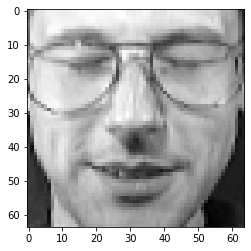

In [132]:
# Displaying a picture from X train set
# Random picture
random_pic = X_train[50]
plt.imshow(random_pic.reshape(64, 64), cmap = "gray")

This is a sample picture. The aim is to cluster all similiar faces into clusters. Now the question arises - which algorithm to use? The data has 4000 features but only 400 instances. The number of features is high so the dataset is relatively high sized. So, we can sart of by using KMeans. The question asks us to cluster using KMeans, but a bayesian Gaussian Mixture can be used to figure out an optimal number of clusters.

In [133]:
# KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 50)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
# Take clusters centers individually
centers = kmeans.cluster_centers_

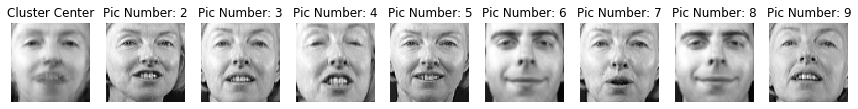

In [135]:
# Code to display the cluster and images in cluster
ncluster = 18
number_images = np.count_nonzero(kmeans.labels_ ==(ncluster-1))

# Showing image
plt.figure(figsize = (15, 12))
# Displaying the cluster center
ax = plt.subplot(1, number_images+1, 1)
ax.imshow(centers[ncluster-1].reshape(64, 64), cmap = "gray")
ax.set_title("Cluster Center")
ax.axis("off")

# Showing other image
cluster_mask = (kmeans.labels_ == ncluster-1)
cluster_images = X_train[cluster_mask]
for index, image in enumerate(cluster_images):
    image = image.reshape(64, 64)
    ax = plt.subplot(1, number_images+1, index+2)
    ax.imshow(image, cmap = "gray")
    ax.set_title("Pic Number: "+str(index+2))
    ax.axis("off")

In [136]:
def plot_cluster_images(ncluster, kmeans):
    number_images = np.count_nonzero(kmeans.labels_ ==(ncluster-1))
    centers = kmeans.cluster_centers_
    # Showing image
    plt.figure(figsize = (15, 12))
    # Displaying the cluster center
    ax = plt.subplot(1, number_images+1, 1)
    ax.imshow(centers[ncluster-1].reshape(64, 64), cmap = "gray")
    ax.set_title("Cluster Center")
    ax.axis("off")

    # Showing other image
    cluster_mask = (kmeans.labels_ == ncluster-1)
    cluster_images = X_train[cluster_mask]
    for index, image in enumerate(cluster_images):
        image = image.reshape(64, 64)
        ax = plt.subplot(1, number_images+1, index+2)
        ax.imshow(image, cmap = "gray")
        ax.set_title("Pic Number: "+str(index+2))
        ax.axis("off")

Two of the six pictures do not look similar for the cluster numeber 25. Some clusters are very well formed while others are not so well formed. In this case, the cluster number 18 is very well formed. Now, lets  try to decide upon the optimum number of clusters. 

In [137]:
# Importing silhouette scores
from sklearn.metrics import silhouette_score

In [138]:
# Finding the optimum number of clusters
low, high = 10, 100
inertia_array =np.empty((high+1-low, 1))
silhouette_array = np.empty((high+1-low, 1))
cluster_array = np.arange(low, high+1)
for index, ncluster in enumerate(range(low, high+1)):
    kmeans = KMeans(n_jobs = -1, n_clusters= ncluster)
    kmeans.fit(X_train)
    
    # Inertia
    inertia_array[index] = kmeans.inertia_
    
    # Silhouette score
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_array[index] = score
    

Text(0, 0.5, 'Silhouette score')

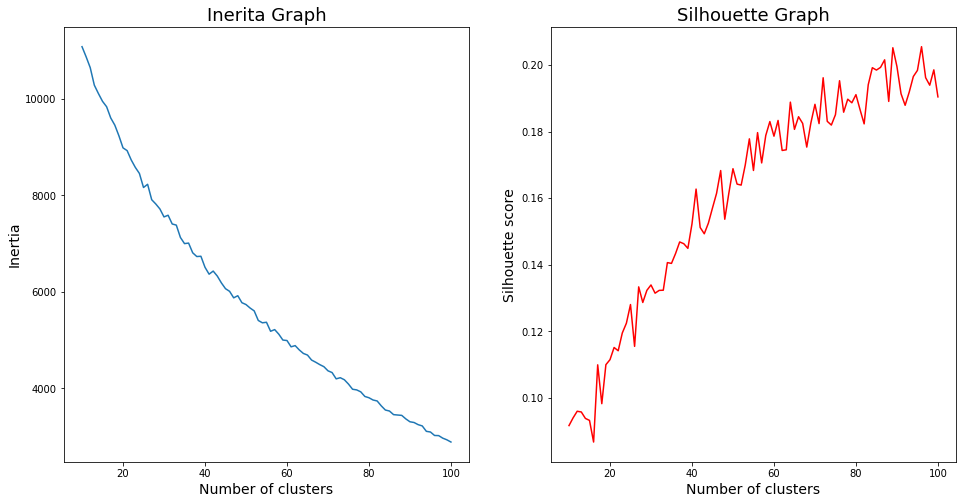

In [139]:
# Plotting Inertia Graph & Silhouette score
plt.figure(figsize = (16, 8))
# Inertia
ax = plt.subplot(1, 2, 1)
ax.plot(cluster_array,inertia_array)
ax.set_title("Inerita Graph", fontsize = 18)
ax.set_xlabel("Number of clusters", fontsize= 14)
ax.set_ylabel("Inertia", fontsize = 14)
# Silhouette
ax2 = plt.subplot(1, 2, 2)
ax2.plot(cluster_array, silhouette_array, c = "r")
ax2.set_title("Silhouette Graph", fontsize = 18)
ax2.set_xlabel("Number of clusters", fontsize = 14)
ax2.set_ylabel("Silhouette score", fontsize = 14)

**Observations**
In the inertia graph we can see that the elbow occurs around 60 clusters. In the silhouette cluster, e can see taht the peak for the entire set occurs near 90 clusters. But, the silhoette score is less even at that number of clusters. But, somemore data is required to make a good choice on the number of clusters. Shortlisting a range of values from inertia graph - we can see that the general decrease is almost constant, but the decrease slows down after 60. So, the range is 60 or above. Now considering this range, the rate of growth of silhouette graph decreases from 70 clusters. The maximum occurs at 70 and around 90. A silhoette diagram at these points can be used to decide further. 

In [140]:
# Range of values
# The indices of highest values 
sil_ind= np.argsort(-silhouette_array.ravel(), kind= "stable")
sil_range = sil_ind[:6] 
# drawing a Silhouette diagram for each of these indices

In [141]:
# Silhouette diagram 
cluster = 5
# Training cluster
KMean = KMeans(cluster, n_jobs = -1)
KMean.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
from matplotlib.ticker import FixedLocator, FixedFormatter
def plot_silhoute_diagram(cluster, KMean):
    # For each label, build a spike
    silhouettes = silhouette_samples(X_train, KMean.labels_)
    labels  = KMean.labels_
    ticks = []
    # Padding
    padding = len(X_train)//30
    pos = padding
    for i in range(cluster):
        coeffs = silhouettes[labels == i]
        coeffs.sort()
        n_instances = len(X_train[labels == i])
    
        # Updating position
        pos += n_instances+padding
    
        # Color
        color = mpl.cm.Spectral(i/cluster)
    
        # showing the shapes
        plt.fill_betweenx(np.arange(pos, pos+n_instances),0, coeffs, 
                     facecolor = color, edgecolor = color, alpha = 0.7)
        plt.title("Number of cluster: "+ str(cluster))
    
    
        # Updating ticks
        ticks.append(pos+n_instances//2)
    
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
        # Plot the mean 
        plt.axvline(silhouette_array[cluster-11], linestyle = "--", c = "r")

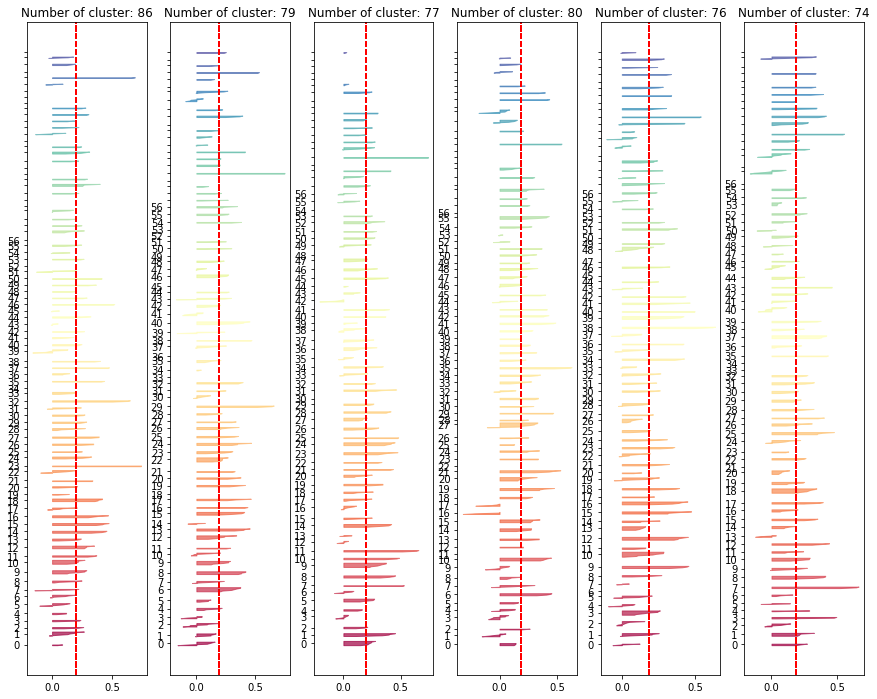

In [143]:
plt.figure(figsize = (15, 12))
for index, i in enumerate(sil_range):
    kmean = KMeans(n_jobs = -1, n_clusters = i)
    kmean.fit(X_train)
    plt.subplot(1, len(sil_range), index+1)
    plot_silhoute_diagram(i, kmean)

**Observations**
In number of cluster 79, almost all clusters reach the silhouette score. Some clusters have more instances than others.
This numebr of cluster though is falls wel within the inertia range and has a local peak in the silhouette score. But, there is a huge range difference. This range differnce. 

In the number of cluster 86, all the clusters are above the silhouette score. There arent much deviations in the size of clusters. The heights are also almost equal. This is not a local peak in the solhouette score but falls well within the iniertia range.

87 has almost the same results as 86 but lower range deviation. 

84 has some clusters which do not reach the silhouette score. 

90 has a lot of deviation in cluster size and silhouette coeffs.

85 has  lot of deviations in coeffs and cluster size. 

SO, the best of th elot is probably among 79, 86 and 87. 86 is a bit better than 87. 86 has lower variation in cluster sizes but 79 has a better coeffs. The deviations in cluster sizes and range of coeffs in 87 are very huge when compared to the advatages of 79 (itis a local maxima after a depression). SO, 79 is chosen as the optimum value for clusters.

In [144]:
# Training a cluster with this cluster number
optimum_number = 79
opt_kmeans = KMeans(n_jobs= -1, n_clusters = optimum_number)
opt_kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=79, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

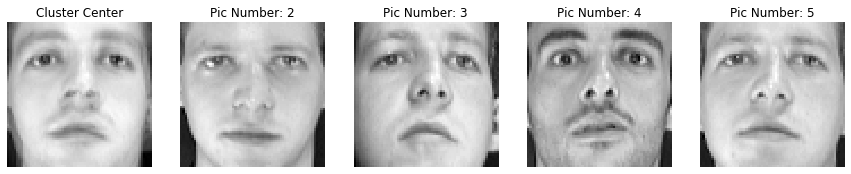

In [145]:
# Labels 
opt_labels = opt_kmeans.labels_
plot_cluster_images(59, opt_kmeans)

A better method would have been to use a dimensionality reduction algorith with a high explained variance ratio to condense the training set. This would have sped up training and time for figuring out silhouette scores. Then, the optimum number of clusters could have been found.

In [146]:
# Training the opt_kmeans
opt_kmeans = KMeans(79)
opt_kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=79, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [147]:
# Semi - Supervised Learning
# use the most optimum kmeans to make a label propagator
# Find the instances near cluster centers
centers = opt_kmeans.cluster_centers_
center_ind = np.argmin(distances, axis = 1)
# labels
center_labels = opt_kmeans.labels_[center_ind]
# One representative for each cluster
distances = opt_kmeans.transform(X_train)

In [148]:
# Copy of X
copy_X = X_train.copy()

In [149]:
distances.shape

(240, 79)

In [150]:
np.full((X_train[0].shape), -1)

array([-1, -1, -1, ..., -1, -1, -1])

### 12. Training a Gaussian Mixture on the Olivetti Faces dataset
The aim of this is to see how a Gaussian Mixture would perform on the dataset. The additional aim is to find out if thsi model is able to detect anomalies (when new images are produced using sample method- darken, flip or rotate these pictures) to form some outlier pictures. Check if the Gaussian ixture is able to identify them.

In [151]:
# This time around, a dimensionality reduction algorithm can be used to speed things up
# Properly spliting the data
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 40)
for train, test in sss.split(X, y):
    X_train_val, X_test = X[train], X[test]
    y_train_val, y_test = y[train], y[test]
    
# Split to divide the train and val sets
for train, val in sss.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train], X_train_val[val]
    y_train, y_val = y_train_val[train], y_train_val[val]

In [152]:
# Train set
X_train.shape

(320, 4096)

In [153]:
# Dimensionality reduction 
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
X_train_red = pca.fit_transform(X_train)

In [154]:
# Number of dimensions in the X_reduced set
X_train_red.shape # 220 instead of 4,096

(320, 221)

In [155]:
# Importing a Gaussian Mixture
from sklearn.mixture import GaussianMixture
gm = GaussianMixture()


In [156]:
# First task is to find the optimum number of clusters for the reduced dataset 
# This can be done using the informatin criteria - AIC and BIC
low, high = 120, 200
clusters_array = np.arange(low, high+1, 5)
aic_array = np.empty((len(clusters_array), 1))
bic_array = np.empty((len(clusters_array), 1))

for index, nclusters in enumerate(range(low, high+1, 5)):
    gm = GaussianMixture(n_components = nclusters)
    gm.fit(X_train_red)
    aic_array[index] = gm.aic(X_train_red)
    bic_array[index] = gm.bic(X_train_red)


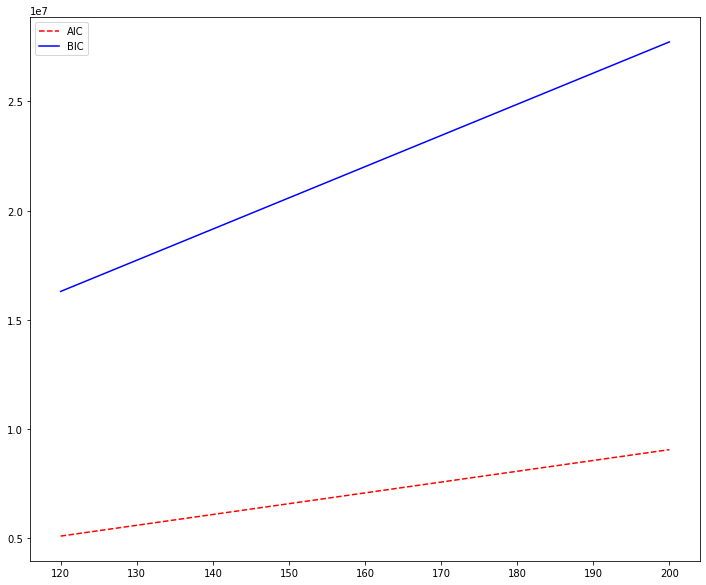

In [157]:
# Plotting the graphs
plt.figure(figsize = (12, 10))
plt.plot(clusters_array, aic_array, linestyle = "--", c = "r", label= "AIC")
plt.plot(clusters_array, bic_array, c = "b", label = "BIC")
plt.legend()
plt.show()

It is unclear what the right number of componenets is. It is sure that it does not lie within the range of 30 & 120. Increasing the range to look at the results. There is no promising result here either. Using a Bayesian Gaussian Model for this.

In [158]:
# Bayesian Gaussian Mixture
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 260)

In [159]:
# Fitting the data
bgm.fit(X_train_red)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=260, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [160]:
# Looking at the weights 
# bgm.weights_
# Almost all the weights are equal in coefficients. 

In [161]:
# Creating new samples
sample_images = bgm.sample()

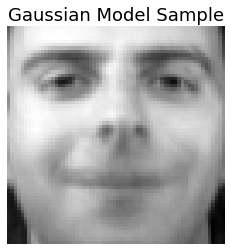

In [162]:
# Inverse Transform 
sample_inverse = pca.inverse_transform(np.array(sample_images[0]))
plt.imshow(sample_inverse.reshape(64, 64), cmap = "gray")
plt.title("Gaussian Model Sample", fontsize = 18)
plt.axis("off")
plt.show()

In [163]:
# Creating 10 samples
sample_images = bgm.sample(10)
sample_original_size = []
for i in sample_images[0]:
    inverse = pca.inverse_transform(i)
    inverse = inverse.reshape(64, 64)
    sample_original_size.append(inverse)

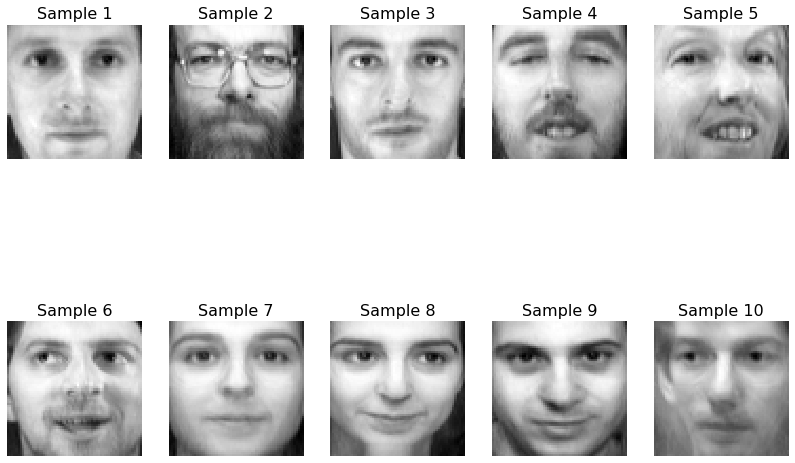

In [164]:
# Showing them together
plt.figure(figsize = (14, 10))
for index, image in enumerate(sample_original_size):
    ax = plt.subplot(2, 5, index+1)
    ax.imshow(image, cmap = "gray")
    ax.set_title("Sample " + str(index+1), fontsize = 16)
    ax.axis("off")

These pictures are generated by the Bayesian Gaussian Mixture sample() method. Trying to manipulate these pictures to make them look like anomalies.

In [165]:
outlier_images = []
for index, image in enumerate(sample_original_size):
    random_number = np.random.rand()
    if random_number <=0.33:
        l_trans = image[-1::-1]
    elif random_number <=0.66:
        mask = (image<0.5)
        mean = image.mean()
        l_trans=image.copy()
        l_trans[mask] = mean
    else:
        indices = np.arange(0, 64 )
        rotate_indices = list((i) for i in (islice(cycle(indices), 32, 96)))
        l_trans = image[rotate_indices]
    
    outlier_images.append(l_trans)
        

NameError: name 'islice' is not defined

In [ ]:
# Showing outliers together
plt.figure(figsize = (14, 10))
for index, image in enumerate(outlier_images):
    ax = plt.subplot(2, 5, index+1)
    ax.imshow(image, cmap = "gray")
    ax.set_title("Sample " + str(index+1), fontsize = 16)
    ax.axis("off")

In [ ]:
# Seeing if the score_samples are lower than usual 
normal_scores = []
for i in sample_images[0]:
    score = bgm.score_samples(i.reshape(1, -1))
    normal_scores.append(score)

In [ ]:
# Outlier scores
outlier_scores = []
for i in outlier_images:
    i_red = pca.transform(i.reshape(4096, 1))
    score=bgm.score_samples(i_red)
    outlier_scores.append(score)

In [ ]:
# looking at the means of both 
normal_scores = np.array(normal_scores)
outlier_scores = np.array(outlier_scores)

n_mean = normal_scores.mean()
o_mean = outlier_scores.mean()
print("Normal Mean: ", n_mean)
print("Outlier Mean: ", o_mean)
print("Differece: ", o_mean-n_mean)

Wow!!, The density estimation (or the ln of PDF) of the outlier images is in the negatives. It shos true confidence in its prediction that the instance is an outlier.

### 13. Using Dimensionality Reduction algorithm for outlier detection
The aim of the exercise is to use dimensionality reduction algorithms to perform outlier detection. The basic idea is same, fit and transform a data using PCA or other algorithms with (inverse_transform), and then reconstruct the image. The point with very high reconstruction error are outliers. 

In [ ]:
# First Step
# Build a PCA for the Olivetti faces dataset
from sklearn.decomposition import PCA
pca= PCA(n_components = 0.99) # With 0.99 variance

# Fitting the dataset
pca.fit(X_train)

In [ ]:
# REduction and reconstruction 
X_red = pca.transform(X_train)

# Reconstruction error
X_reconstruct = pca.inverse_transform(X_red)

In [ ]:
# Reconstruction error
from sklearn.metrics import mean_squared_error

reconstruction_error = mean_squared_error(X_train, X_reconstruct)

In [ ]:
original_reconstruction_error = []
for image, reconstructed in zip(X_train, X_reconstruct):
    error = mean_squared_error(image, reconstructed)
    original_reconstruction_error.append(error)

In [ ]:
np.array(original_reconstruction_error).mean()

In [ ]:
# Outlier reduction and transformation 
outlier_images = np.array(outlier_images)
outlier_reduced = pca.transform(outlier_images.reshape(-1, 4096))

# Reconstruct
outlier_reconstruct = pca.inverse_transform(outlier_reduced)

In [ ]:
outlier_error = []
for image, recon in zip(outlier_images, outlier_reconstruct):
    error = mean_squared_error(image.reshape(4096, 1), recon.reshape(4096, 1))
    outlier_error.append(error)

In [ ]:
np.array(outlier_error).mean()
# THe error is 10 times more than on normal instances
(np.array(outlier_error).mean()/np.array(original_reconstruction_error).mean())

In [ ]:
# Errors

In [ ]:
outlier_images[0].shape

In [ ]:
X_train.shape

In [ ]:
plt.figure(figsize = (20, 18))
l = 0
for index in range(len(outlier_images)):
    image = outlier_images[index]
    recon = outlier_reconstruct[index]
    
    ax1 = plt.subplot(10, 2, l+1)
    ax1.imshow(image.reshape(64, 64), cmap = "gray" )
    ax2 = plt.subplot(10, 2, l+2)
    ax2.imshow(recon.reshape(64, 64), cmap = "gray")
    if l == 0:
        ax2.set_title("Reconstructed Image: "+str(np.array(outlier_error)[index]))
    else:
        ax2.set_title(np.array(outlier_error)[index])
    ax2.axis("off")
    ax1.axis("off")
    l += 2
    

We can observe that the inverse transform tries to create a face. The transformation is tries to make a human face. So, naturally the error is highest when the face is split or is flipped. The error when the image is darkened is lower. 

### 11. Perform a classification task with KMeans for Dimensionality reduction
* 1) Perform classification and check performance on validation set
* 2) Perform classification with KMeans as dimensionality reduction & performance on Val set
* 3) Search for the best number of clusters to maximize performance
* 4) Append the dimensionality reduction features to the dataset and now search for optimum number of clusters

In [ ]:
X_train.shape, X_val.shape, X_test.shape

In [ ]:
# 1. Performing the classification task using a ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_jobs = -1, n_estimators = 100)

In [ ]:
# Fitting the dataset
et_model = et_clf.fit(X_train, y_train)
# Testing the performance on val set
val_preds = et_model.predict(X_val)
val_error = accuracy_score(y_val, val_preds)
print(val_error) # The classification rate is high at 92%

In [ ]:
# 2. Perform classification with KMeans as dimensionality reduction algorithm
kmeans = KMeans(n_jobs = -1, n_clusters = 79)
X_train_red = kmeans.fit_transform(X_train)

In [ ]:
# Training a new trees model
et_clf  = ExtraTreesClassifier(n_jobs = -1, n_estimators = 100)
et_dim_model = et_clf.fit(X_train_red, y_train)

In [ ]:
# Perfromance on the test set
val_dim_preds = et_dim_model.predict(kmeans.transform(X_val))
val_dim_score = accuracy_score(y_val, val_dim_preds)
print(val_dim_score) # The accuracy reduced to 0.8 or 80%

In [ ]:
# 3. Searching for the best number of clusters
# Creating a Pipeline
from sklearn.pipeline import Pipeline

kmeans_et = Pipeline([
    ("kmeans", KMeans(n_jobs = -1)), 
    ("Classifier", ExtraTreesClassifier(n_jobs = -1))
])


# Params Grid 
param_grid = [{
    "kmeans__n_clusters":np.linspace(35, 60, 7).astype(np.int32)
}]

In [ ]:
# GridSearch for the best number of clusters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(kmeans_et, param_grid, cv = 3, scoring = "accuracy")
grid.fit(X_train, y_train)

In [ ]:
display_scores(grid)

In [ ]:
best_params_2 = grid.best_params_

In [ ]:
best_params_1 = grid.best_params_

In [ ]:
# The best number of clusters are 150 
best_kmeans = KMeans(n_clusters = 155, n_jobs = -1)
best_kmeans.fit(X_train)

In [ ]:
# Using the best kmeans algorithm to find distances & Append them as features to data 
# For this a custom class has to be written 
from sklearn.base import BaseEstimator, TransformerMixin

class AppendFeatures(BaseEstimator, TransformerMixin):
    """
    This class appends the features produced in KMeans transform to the original 
    dataset
    """
    
    def __init__(self, clusters = None):
        
        if clusters == None:
            self.n_c = 10
        else:
            copy = int(clusters)
            self.n_c = copy
            
        
        return None
    
    def fit(self, X):
        # Fitting the KMeans method
        kmeans_model = KMeans(self.n_c)
        kmeans.fit(X)
        self.k = kmeans_model
        return(self)
    
    def transform(self, X):
        # Training the model
        kmeans = self.k
        dist= kmeans.transform(X)
        # Appending
        array = np.append(X, dist, axis = 1)
        
        return array
   

In [ ]:
# Training a Extra Trees 
append_pipeline = Pipeline([
    ("append", AppendFeatures()),
    ("Trees", ExtraTreesClassifier())
])

In [ ]:
# Using a grid 
params_grid = [{
    "append__clusters":[40]
}]

In [ ]:
# Manually appending features
X_mod = best_kmeans.transform(X_train)
X_val_mod = best_kmeans.transform(X_val)

In [ ]:
# Appending the features to the original set
X_mod_appended = np.append(X_train, X_mod, axis = 1)
X_val_mod_appended = np.append(X_val, X_val_mod, axis = 1)

In [ ]:
# Training on the train mod set
ex_clf = ExtraTreesClassifier(n_jobs = -1)
ex_clf.fit(X_mod_appended, y_train)

In [ ]:
# Score on val set
ex_clf.score(X_val_mod_appended, y_val) # The score is at 97.5%, 92.5% But huge boost.

### Supervised Learning

In [ ]:
# Train, val and test
X_train.shape, X_val.shape, X_test.shape

In [ ]:
# Now training on the train set to for a baseline for 
# comparision
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs = -1,)

In [ ]:
# Training
rf_clf.fit(X_train, y_train)
# On val
rf_clf.score(X_val, y_val) # 97.5%

In [ ]:
# What if the training occurs only on 58 picture
pictures = 58
permutation = np.random.permutation(np.arange(320))[:58]
rf_clf = RandomForestClassifier(n_jobs = -1,)

In [ ]:
# training & testing
rf_clf.fit(X_train[permutation],y_train[permutation])
# score
rf_clf.score(X_val, y_val) # 47.5 %
# Very weak learner

In [ ]:
# Clustering
kmeans = KMeans(58, n_jobs = -1)
kmeans.fit(X_train)

In [ ]:
# Copy X train
copy = X_train.copy()

In [ ]:
# Percentile 
percentile = 30
distances = kmeans.transform(X_train)
l = 0
for index in range(58):
    in_cluster = (kmeans.labels_ == index)
    cluster_distances = distances[:, index]
    threshold = np.percentile(cluster_distances[in_cluster], percentile, axis = 0)
    # Mask
    above_mask = (cluster_distances>threshold)
    combined = (above_mask)&(in_cluster)
    # Making them one
    copy[combined] = -1

In [ ]:
# Propagated list
prop_mask = ((copy!= -1).all(axis = 1))
# X prop
X_propagated = X_train[prop_mask]
y_propagated= y_train[prop_mask]

In [ ]:
# Shapes of propagated
X_propagated.shape, y_propagated.shape

In [ ]:
# Label propagation to all these 
labels = kmeans.labels_
labels_propagated = labels[prop_mask] # Cluster indices

In [ ]:
# Finding the label for each cluster
closest_ind = np.argmin(distances, axis = 0)
# Finding the y_train labels for these points 
cluster_labels = y_train[closest_ind]

In [ ]:
# Propagation 
y_labels = cluster_labels[labels_propagated]

In [ ]:
# Trianing on the new data
rf_clf = RandomForestClassifier(n_jobs = -1)

# training
rf_model = rf_clf.fit(X_propagated, y_labels)

In [ ]:
# Score
rf_model.score(X_val, y_val) # 0.6, an improvement from 0.45

In [ ]:
# how many of the labels were right?
score = accuracy_score(y_propagated, y_labels)
print(score) # 93% of the propagated were right when the percentile was left at 20.

**Reflection**
The concept at hand is semi - supervised learning. The objective is simple, to increase the size of the training set without distrubing the quality of it (not adding noise). The simple steps to be followed are -

* 1) Implement a KMeans
* 2) Find the cluster centers and find their labels
* 3) Now, divide the set in percentiles 
    * This is the most tricky part but can be easily solved.
    * First consider an array containing all the distances (all instances to all centers)
    * Then for each cluster, filter out the distances of instances in the cluster
    * Now find a percentile threshold. Using this threshold, create a mask on the initial distances[:, index]
      array. This is so that all the masks contain the same dimensions and can be combined.
    * Every instance above the threshold & in cluster can be marked as -1 in the training set
* 4) Use a mask to filter out instances which are -1 by using .all(axis = 1). This mask is the 
     for proagation.
* 5) Propagate the labels on the basis of clusters indices. 
* 6) The new training set is so formed. 
      